In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Generate data - 3 clusters (1, 2, 3)
mean_1 = [2, 1]
cov_1 = [[0.2, 0.3], [0.3, 0.2]]

mean_2 = [10,3]
cov_2 = [[0.2, 0.3], [0.03, 0.2]]

mean_3 = [8, 5]
cov_3 = [[0.2, 0.3], [0.3, 0.2]]

x1, y1 = np.random.multivariate_normal(mean_1, cov_1, 1000, check_valid = 'ignore').T
x2, y2 = np.random.multivariate_normal(mean_2, cov_2, 1000, check_valid = 'ignore').T
x3, y3 = np.random.multivariate_normal(mean_3, cov_3, 1000, check_valid = 'ignore').T

<AxesSubplot:>

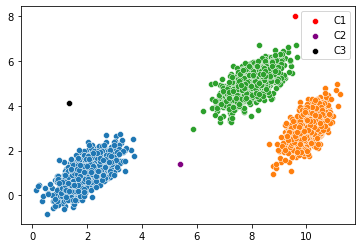

In [5]:
#initialize centroids
c1x, c1y = random.uniform(0,10), random.uniform(0,10)
c2x, c2y = random.uniform(0,10), random.uniform(0,10)
c3x, c3y = random.uniform(0,10), random.uniform(0,10)

# Create a joint plot
sns.scatterplot(x=x1, y=y1)
sns.scatterplot(x=x2, y=y2)
sns.scatterplot(x=x3, y=y3)

sns.scatterplot(x=[c1x], y=[c1y], color = "red", label = 'C1')
sns.scatterplot(x=[c2x], y=[c2y], color = "purple", label = 'C2')
sns.scatterplot(x=[c3x], y=[c3y], color = "black", label = 'C3')

In [6]:
#concatentate data
x = np.concatenate((x1, x2, x3), axis = 0)
y = np.concatenate((y1, y2, y3), axis = 0)

In [7]:
def update_centroids(c1x, c1y, c2x, c2y, c3x, c3y, x, y):
    #initialize stacks belonging to each centroid
    c1x_points = []
    c2x_points = []
    c3x_points = []

    c1y_points = []
    c2y_points = []
    c3y_points = []

    #calculate distance for each point and assign each point to the correct centroid
    for i in range(len(x)):
        dist1 = np.sqrt((x[i] - c1x)**2 + (y[i] - c1y)**2)
        dist2 = np.sqrt((x[i] - c2x)**2 + (y[i] - c2y)**2)
        dist3 = np.sqrt((x[i] - c3x)**2 + (y[i] - c3y)**2)

        if (dist1 < dist2) and (dist1 < dist3):
            c1x_points.append(x[i])
            c1y_points.append(y[i])

        elif (dist2 < dist1) and (dist2 < dist3):
            c2x_points.append(x[i])
            c2y_points.append(y[i])

        elif (dist3 < dist1) and (dist3 < dist2):
            c3x_points.append(x[i])
            c3y_points.append(y[i])

    #update centroids
    c1x, c1y = np.mean(c1x_points), np.mean(c1y_points)
    c2x, c2y = np.mean(c2x_points), np.mean(c2y_points)
    c3x, c3y = np.mean(c3x_points), np.mean(c3y_points)
    
    return c1x, c1y, c2x, c2y, c3x, c3y

Initial positions (step 0)


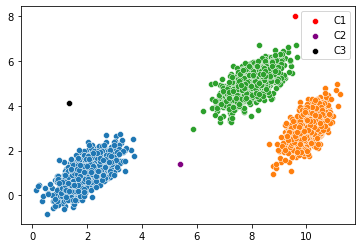

Step 1:


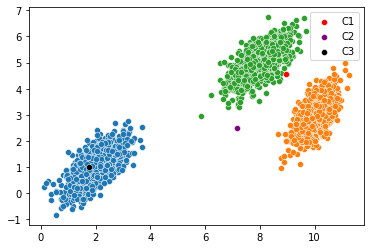

Step 2:


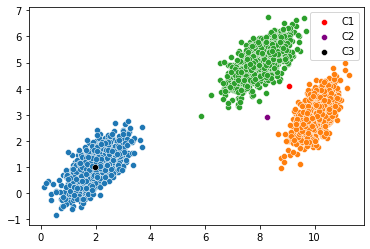

Step 3:


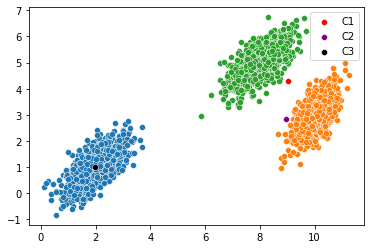

Step 4:


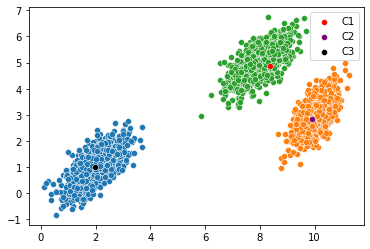

Step 5:


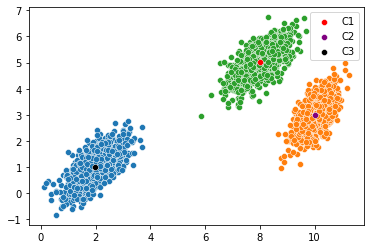

In [8]:
epochs = 5

print('Initial positions (step 0)')
sns.scatterplot(x=x1, y=y1)
sns.scatterplot(x=x2, y=y2)
sns.scatterplot(x=x3, y=y3)

sns.scatterplot(x=[c1x], y=[c1y], color = "red", label = 'C1')
sns.scatterplot(x=[c2x], y=[c2y], color = "purple", label = 'C2')
sns.scatterplot(x=[c3x], y=[c3y], color = "black", label = 'C3')

plt.show()

for i in range(epochs):
    print(f"Step {i+1}:")
    c1x, c1y, c2x, c2y, c3x, c3y = update_centroids(c1x, c1y, c2x, c2y, c3x, c3y, x, y)
    # Create a joint plot
    sns.scatterplot(x=x1, y=y1)
    sns.scatterplot(x=x2, y=y2)
    sns.scatterplot(x=x3, y=y3)

    sns.scatterplot(x=[c1x], y=[c1y], color = "red", label = 'C1')
    sns.scatterplot(x=[c2x], y=[c2y], color = "purple", label = 'C2')
    sns.scatterplot(x=[c3x], y=[c3y], color = "black", label = 'C3')
    
    plt.show()